In [1]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from catboost import CatBoostRegressor

from pyspark.sql import SparkSession

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 3, Finished, Available, Finished)

In [2]:
# Crear una sesión Spark
spark = SparkSession.builder.appName("LakehouseAccess").getOrCreate()

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 4, Finished, Available, Finished)

In [3]:
# Cargar las tablas necesarias
sales_order_header_spark = spark.read.format("delta").load("abfss://1a54c558-0e66-4580-b7a7-c42f7628e088@onelake.dfs.fabric.microsoft.com/a4c39790-b68a-4e13-8d3b-e8f25a6a7e22/Tables/Sales_SalesOrderHeader")

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 5, Finished, Available, Finished)

In [4]:
# Convertir a pandas DataFrames
sales_header_df = sales_order_header_spark.toPandas()

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 6, Finished, Available, Finished)

In [5]:
sales_header_df.drop_duplicates(inplace=True)

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 7, Finished, Available, Finished)

In [6]:
sales_header_df.info()

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 8, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   SalesOrderID            31465 non-null  int32         
 1   RevisionNumber          31465 non-null  int16         
 2   OrderDate               31465 non-null  datetime64[us]
 3   DueDate                 31465 non-null  datetime64[us]
 4   ShipDate                31465 non-null  datetime64[us]
 5   Status                  31465 non-null  int16         
 6   OnlineOrderFlag         31465 non-null  bool          
 7   SalesOrderNumber        31465 non-null  object        
 8   PurchaseOrderNumber     3806 non-null   object        
 9   AccountNumber           31465 non-null  object        
 10  CustomerID              31465 non-null  int32         
 11  SalesPersonID           3806 non-null   float64       
 12  TerritoryID             31465 non-null  int32 

In [7]:
sales_header_df.head()

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 9, Finished, Available, Finished)

,SalesOrderID,RevisionNumber,OrderDate,DueDate,ShipDate,Status,OnlineOrderFlag,SalesOrderNumber,PurchaseOrderNumber,AccountNumber,...,CreditCardID,CreditCardApprovalCode,CurrencyRateID,SubTotal,TaxAmt,Freight,TotalDue,Comment,rowguid,ModifiedDate
0,51956,8,2013-07-01,2013-07-13,2013-07-08,5,True,SO51956,None,10-4030-029393,...,16470.0,728614Vi85242,8757.0,23.7800,1.9024,0.5945,26.2769,None,221d4072-7623-43d5-9da8-cd01aee0eabb,2013-07-08
1,52440,8,2013-07-11,2013-07-23,2013-07-18,5,True,SO52440,None,10-4030-029451,...,9257.0,1028136Vi47744,8867.0,25.4800,2.0384,0.6370,28.1554,None,9c129950-1ac8-460e-ae99-d51b64880bac,2013-07-18
2,56779,8,2013-09-25,2013-10-07,2013-10-02,5,True,SO56779,None,10-4030-029379,...,9636.0,628610Vi49646,9703.0,23.7800,1.9024,0.5945,26.2769,None,179e6dda-00cd-4bb2-8599-ffd978d1d975,2013-10-02
3,58165,8,2013-10-17,2013-10-29,2013-10-24,5,True,SO58165,None,10-4030-029427,...,3806.0,228163Vi20034,9945.0,21.4900,1.7192,0.5373,23.7465,None,646e95e1-b09c-46f8-8414-b7b447eb5e89,2013-10-24
4,60013,8,2013-11-12,2013-11-24,2013-11-19,5,True,SO60013,None,10-4030-029387,...,807.0,328613Vi4088,10231.0,21.4900,1.7192,0.5373,23.7465,None,a4849460-53ff-4498-bb79-8725438483f9,2013-11-19


In [8]:
sales_header_df.columns

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 10, Finished, Available, Finished)

Index(['SalesOrderID', 'RevisionNumber', 'OrderDate', 'DueDate', 'ShipDate',
       'Status', 'OnlineOrderFlag', 'SalesOrderNumber', 'PurchaseOrderNumber',
       'AccountNumber', 'CustomerID', 'SalesPersonID', 'TerritoryID',
       'BillToAddressID', 'ShipToAddressID', 'ShipMethodID', 'CreditCardID',
       'CreditCardApprovalCode', 'CurrencyRateID', 'SubTotal', 'TaxAmt',
       'Freight', 'TotalDue', 'Comment', 'rowguid', 'ModifiedDate'],
      dtype='object')

In [9]:
# Selección de columnas relevantes de cada tabla
sales_header_df = sales_header_df[['SalesOrderID', 'OrderDate', 'CustomerID', 'TerritoryID', 'TotalDue']]


StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 11, Finished, Available, Finished)

In [10]:
sales_header_df.head()

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 12, Finished, Available, Finished)

,SalesOrderID,OrderDate,CustomerID,TerritoryID,TotalDue
0,51956,2013-07-01,29393,7,26.2769
1,52440,2013-07-11,29451,7,28.1554
2,56779,2013-09-25,29379,7,26.2769
3,58165,2013-10-17,29427,7,23.7465
4,60013,2013-11-12,29387,7,23.7465


In [11]:
sales_header_df.info()

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 13, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SalesOrderID  31465 non-null  int32         
 1   OrderDate     31465 non-null  datetime64[us]
 2   CustomerID    31465 non-null  int32         
 3   TerritoryID   31465 non-null  int32         
 4   TotalDue      31465 non-null  object        
dtypes: datetime64[us](1), int32(3), object(1)
memory usage: 860.5+ KB


In [12]:
# Convertir la columna TotalDue a tipo float
sales_header_df['TotalDue'] = pd.to_numeric(sales_header_df['TotalDue'], errors='coerce')

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 14, Finished, Available, Finished)

In [13]:
reference_date = sales_header_df['OrderDate'].max() - pd.DateOffset(months=6)

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 15, Finished, Available, Finished)

In [14]:
# Datos históricos (más de 6 meses atrás)
historical_data = sales_header_df[sales_header_df['OrderDate'] < reference_date]

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 16, Finished, Available, Finished)

In [15]:
historical_data.info()

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 17, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Index: 19402 entries, 0 to 31464
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SalesOrderID  19402 non-null  int32         
 1   OrderDate     19402 non-null  datetime64[us]
 2   CustomerID    19402 non-null  int32         
 3   TerritoryID   19402 non-null  int32         
 4   TotalDue      19402 non-null  float64       
dtypes: datetime64[us](1), float64(1), int32(3)
memory usage: 682.1 KB


In [16]:
# Calculamos agregados por cliente en datos históricos
customer_features = historical_data.groupby('CustomerID').agg(
    AvgOrderValue=('TotalDue', 'mean'),
    TotalHistoricalSpend=('TotalDue', 'sum'),
    OrderCount=('SalesOrderID', 'nunique'),
    # Para cada cliente esta feature asigna el territorio más frecuente en el que ha realizado compras.
    TerritoryID=('TerritoryID', lambda x: x.mode()[0] if not x.mode().empty else None)
).reset_index()

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 18, Finished, Available, Finished)

In [17]:
customer_features.info()

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 19, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13020 entries, 0 to 13019
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            13020 non-null  int32  
 1   AvgOrderValue         13020 non-null  float64
 2   TotalHistoricalSpend  13020 non-null  float64
 3   OrderCount            13020 non-null  int64  
 4   TerritoryID           13020 non-null  int32  
dtypes: float64(2), int32(2), int64(1)
memory usage: 407.0 KB


In [18]:
# Datos futuros (últimos 6 meses)
future_data = sales_header_df[sales_header_df['OrderDate'] >= reference_date]

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 20, Finished, Available, Finished)

In [19]:
future_data.describe()

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 21, Finished, Available, Finished)

,SalesOrderID,OrderDate,CustomerID,TerritoryID,TotalDue
count,12063.000000,12063,12063.000000,12063.000000,12063.000000
mean,69092.000000,2014-03-24 02:12:08.773936,19780.748653,6.097405,2119.580483
min,63061.000000,2013-12-30 00:00:00,11001.000000,1.000000,2.530500
25%,66076.500000,2014-02-09 00:00:00,14739.500000,4.000000,44.177900
50%,69092.000000,2014-03-27 00:00:00,18944.000000,6.000000,142.511900
75%,72107.500000,2014-05-03 00:00:00,24794.500000,9.000000,1922.421300
max,75123.000000,2014-06-30 00:00:00,30118.000000,10.000000,130907.049600
std,3482.432483,NaN,5838.802161,2.964731,8171.844736


In [20]:
# Calcular el gasto total de cada cliente en los "próximos 6 meses" (nuestro conjunto de datos futuro)
future_spend = future_data.groupby('CustomerID')['TotalDue'].sum().reset_index()
future_spend.rename(columns={'TotalDue': 'FutureSpend'}, inplace=True)

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 22, Finished, Available, Finished)

In [21]:
future_spend.head()

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 23, Finished, Available, Finished)

,CustomerID,FutureSpend
0,11001,650.8008
1,11012,6.9394
2,11013,82.8529
3,11017,820.2968
4,11018,874.4086


In [22]:
# Unir características históricas con gasto futuro
final_dataset = pd.merge(customer_features, future_spend, on='CustomerID', how='left')

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 24, Finished, Available, Finished)

In [23]:
final_dataset.info()

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 25, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13020 entries, 0 to 13019
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            13020 non-null  int32  
 1   AvgOrderValue         13020 non-null  float64
 2   TotalHistoricalSpend  13020 non-null  float64
 3   OrderCount            13020 non-null  int64  
 4   TerritoryID           13020 non-null  int32  
 5   FutureSpend           4363 non-null   float64
dtypes: float64(3), int32(2), int64(1)
memory usage: 508.7 KB


In [24]:
# Clientes sin compras futuras tienen gasto futuro = 0
final_dataset['FutureSpend'] = final_dataset['FutureSpend'].fillna(0)

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 26, Finished, Available, Finished)

In [25]:
# Separar características y variable objetivo
X = final_dataset.drop(['FutureSpend', 'CustomerID'], axis=1)
y = final_dataset['FutureSpend']

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 27, Finished, Available, Finished)

In [26]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 28, Finished, Available, Finished)

In [27]:
# Crear un objeto de scaler
# StandardScaler transforma los datos para que tengan una media de 0 y una desviación estándar de 1.
# MinMaxScaler reescala los datos para que estén en un rango específico, normalmente entre 0 y 1. Se puede especificar con el parámetro feature_range.
scalerStd = StandardScaler()
scalerMinMax = MinMaxScaler()

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 29, Finished, Available, Finished)

In [28]:
# Ajustar y transformar los datos de X_train
X_train_scaled = scalerStd.fit_transform(X_train)

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 30, Finished, Available, Finished)

In [29]:
# Crear instancia del modelo
model = LinearRegression()

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 31, Finished, Available, Finished)

In [30]:
# Entrenar el modelo
model.fit(X_train_scaled, y_train)

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 32, Finished, Available, Finished)

LinearRegression()

In [31]:
# Transformar X_test usando el mismo scaler (sin ajustarlo a los datos de X_test)
X_test_scaled = scalerStd.transform(X_test)

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 33, Finished, Available, Finished)

In [32]:
# Predicciones en conjunto de prueba
y_pred = model.predict(X_test_scaled)

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 34, Finished, Available, Finished)

In [33]:
# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 35, Finished, Available, Finished)

Error cuadrático medio (MSE): 35128290.35
Raíz del error cuadrático medio (RMSE): 5926.91
Coeficiente de determinación (R²): 0.7168


In [34]:
# Crear Modelo Random Forest y entrenar
# En los árboles de decisión, la escala de los datos no afecta al proceso de división.
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)


StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 36, Finished, Available, Finished)

RandomForestRegressor(random_state=42)

In [35]:
# Realizamos la predicción
y_pred_rf = model_rf.predict(X_test)

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 37, Finished, Available, Finished)

In [36]:
# Métricas de evaluación
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n--- Métricas de evaluación de Random Forest ---")
print(f"Error cuadrático medio (MSE): {mse_rf:.2f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse_rf:.2f}")
print(f"Coeficiente de determinación (R²): {r2_rf:.4f}")

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 38, Finished, Available, Finished)


--- Métricas de evaluación de Random Forest ---
Error cuadrático medio (MSE): 24058888.39
Raíz del error cuadrático medio (RMSE): 4904.99
Coeficiente de determinación (R²): 0.8060


In [37]:
# Definir modelo CatBoost
catboost_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    verbose=100,  # Mostrar progreso cada 100 iteraciones
    random_seed=42
)

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 39, Finished, Available, Finished)

In [38]:
# Entrenar modelo
# CatBoost utiliza árboles de decisión como su modelo base.
catboost_model.fit(
    X_train, 
    y_train,
    eval_set=(X_test, y_test),
    early_stopping_rounds=50
)

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 40, Finished, Available, Finished)

0:	learn: 9893.7400611	test: 10410.6977147	best: 10410.6977147 (0)	total: 88ms	remaining: 43.9s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 4641.512782
bestIteration = 25

Shrink model to first 26 iterations.


In [39]:
# Evaluar modelo CatBoost
y_pred_catboost = catboost_model.predict(X_test)
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
rmse_catboost = np.sqrt(mse_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

print("\n--- Métricas de evaluación de CatBoost ---")
print(f"Error cuadrático medio (MSE): {mse_catboost:.2f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse_catboost:.2f}")
print(f"Coeficiente de determinación (R²): {r2_catboost:.4f}")

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 41, Finished, Available, Finished)


--- Métricas de evaluación de CatBoost ---
Error cuadrático medio (MSE): 21543640.57
Raíz del error cuadrático medio (RMSE): 4641.51
Coeficiente de determinación (R²): 0.8263


StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 42, Finished, Available, Finished)

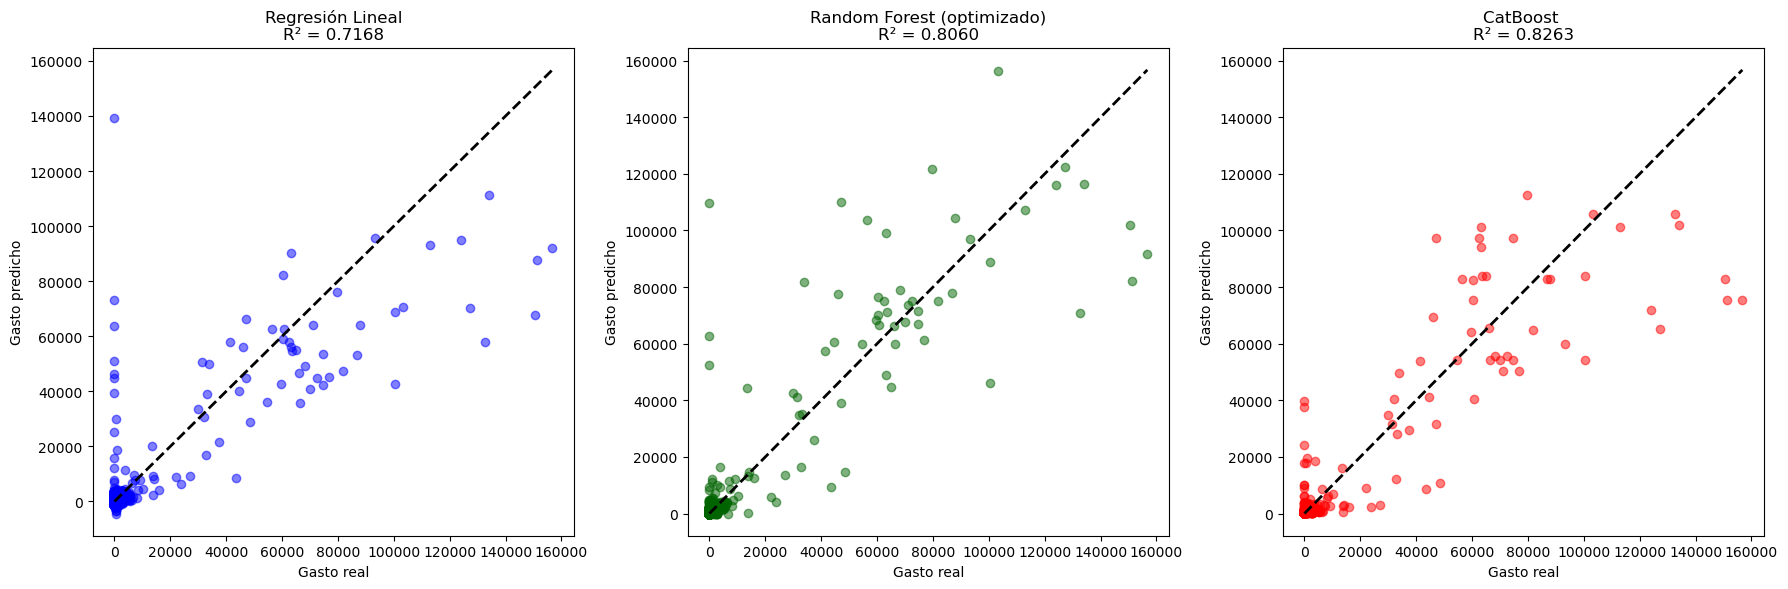

In [40]:
# Visualización de todos los modelos

# Configuración de la figura
plt.figure(figsize=(18, 6))  # Ajustamos el tamaño para 3 gráficos en una fila

# 1. Regresión Lineal
plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, primer gráfico
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Gasto real')
plt.ylabel('Gasto predicho')
plt.title('Regresión Lineal\nR² = {:.4f}'.format(r2))

# 2. Random Forest optimizado
plt.subplot(1, 3, 2)  # 1 fila, 3 columnas, segundo gráfico
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='darkgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Gasto real')
plt.ylabel('Gasto predicho')
plt.title('Random Forest (optimizado)\nR² = {:.4f}'.format(r2_rf))

# 3. CatBoost
plt.subplot(1, 3, 3)  # 1 fila, 3 columnas, tercer gráfico
plt.scatter(y_test, y_pred_catboost, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Gasto real')
plt.ylabel('Gasto predicho')
plt.title('CatBoost \nR² = {:.4f}'.format(r2_catboost))

# Ajustar layout y mostrar
plt.tight_layout()
plt.show()

In [41]:
HistoricalSpend = final_dataset.copy()

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 43, Finished, Available, Finished)

In [42]:
HistoricalSpend['TotalHistoricalSpend'] = HistoricalSpend['TotalHistoricalSpend'] + HistoricalSpend['FutureSpend']

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 44, Finished, Available, Finished)

In [43]:
HistoricalSpend = HistoricalSpend.drop(columns = ['FutureSpend'])

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 45, Finished, Available, Finished)

In [44]:
# Guardar la columna 'CustomerID' en una variable separada
customer_ids = HistoricalSpend['CustomerID']

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 46, Finished, Available, Finished)

In [45]:
X = HistoricalSpend.drop(columns = ['CustomerID'])

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 47, Finished, Available, Finished)

In [46]:
FutureSpend = catboost_model.predict(X)

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 48, Finished, Available, Finished)

In [47]:
# Reemplazar valores negativos por 0
FutureSpend[FutureSpend < 0] = 0

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 49, Finished, Available, Finished)

In [48]:
results = pd.DataFrame({
    'CustomerID': customer_ids.iloc[HistoricalSpend.index],  # Obtener los 'CustomerID' de las filas usadas en la prueba
    'FutureSpend': FutureSpend
})

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 50, Finished, Available, Finished)

In [49]:
# Unir características históricas con gasto futuro
final_df = pd.merge(HistoricalSpend, results, on='CustomerID', how='left')

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 51, Finished, Available, Finished)

In [50]:
final_df.describe()

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 52, Finished, Available, Finished)

,CustomerID,AvgOrderValue,TotalHistoricalSpend,OrderCount,TerritoryID,FutureSpend
count,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000
mean,20211.166743,2300.983622,9213.553498,1.490169,6.101459,1726.624347
std,5778.214264,7526.794332,52793.819149,1.208686,3.020133,8809.915339
min,11000.000000,1.518300,1.518300,1.000000,1.000000,120.177657
25%,15018.750000,62.951900,79.095900,1.000000,4.000000,412.702377
50%,19924.500000,865.204000,1663.973400,1.000000,7.000000,596.076657
75%,25412.250000,2444.013750,4812.949100,2.000000,9.000000,769.340314
max,30118.000000,158637.519700,989184.082000,20.000000,10.000000,137113.012956


In [51]:
# Guardar el DataFrame en el Lakehouse
final_df.to_csv('/lakehouse/default/Files/PrediccionesCompras.csv', index=False)

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 53, Finished, Available, Finished)

In [52]:
# Si tienes un DataFrame de pandas llamado final_df
spark_df = spark.createDataFrame(final_df)

# Guardar el DataFrame de Spark como una tabla Delta en el Lakehouse
spark_df.write.format("delta").mode("overwrite").saveAsTable("PrediccionesCompras")

StatementMeta(, de5ecfa6-2010-4b4b-aebb-47d40250eb98, 54, Finished, Available, Finished)